# Prática 1

## Inferência Bayesiana

***Estatística para Ciência de Dados***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**






### Exercício:

Na aplicação de dados bancários que vimos na Aula 1 (clientes do banco), considere diferentes tamanhos de amostra e diferentes prioris e veja como interferem na posteriori.  Uma possibilidade seria considerar uma distribuição a priori beta para a proporção p, com diferentes parâmetros. Outra possibilidade seria considerar uma distribuição a priori uniforme para p.

### Exemplo de priori conjugada beta-Bernoulli

Ver https://towardsdatascience.com/conjugate-prior-explained-75957dc80bfb



No exemplo do banco, se considerarmos que


- $X=\left\{ \begin{array}{lll} 1, &\mbox{se o cliente é classificado como inadimplente,} \\ 0, &\mbox{caso contrário.} \end{array}\right.$


- $X \sim Bernoulli(p)$


- Verossimilhança:

Para $n$ suficientemente grande, pelo TLC sabemos que a distribuição amostral de $\bar{X}$ se aproxima da normal $$\bar{X} \sim N\left(p, \displaystyle{\frac{p(1-p)}{n}}\right)$$


Além disso, $Y = \sum_{i=1}^{n} X_i \sim binomial(np, np(1-p))$. 





In [1]:
import pandas as pd

# pkgdir = '/home/cibele/CibelePython/ECD/Data'


# Dados banco - Leitura dos dados
dados = pd.read_csv('dados_banco.csv', index_col=0, decimal=',')
# dados = pd.read_csv(f'{pkgdir}/dados_banco.csv', index_col=0, decimal=',')

dados.head()

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
1,1,M,33,Privada,6019,1084.98,0.0,0.0,1214.35,0
2,2,F,31,Pública,5134,532.09,0.0,0.0,1662.96,0
3,3,M,31,Pública,5286,719.91,0.0,0.0,2167.97,0
4,4,F,32,Privada,5534,547.47,0.0,0.0,639.13,1
5,5,F,28,Autônomo,4559,412.81,0.0,0.0,1466.96,1


**Considere diferentes tamanhos de amostra. Como interferem na posteriori?** 

In [3]:
# Vamos trabalhar com uma amostra

import random
from scipy.stats import beta

a = 2
b = 8

amostra = dados.sample(n=500, replace=False, random_state=10)

n = len(amostra)
k = amostra['Inadimplente'].sum()
posteriori = beta(a + k, n - k + b) 

k/n

0.242

**Considere diferentes tipos de priori, por exemplo beta ou uniforme. Como interferem na posteriori?**

## Priori 1 - beta

- Priori: $p \sim beta(2, 8)$ => favorece p=0.0 => cauda à direita


- Posteriori: $p|k \sim beta(k+a, n-k+b)$

onde $k$ é o número de sucessos observados na amostra.


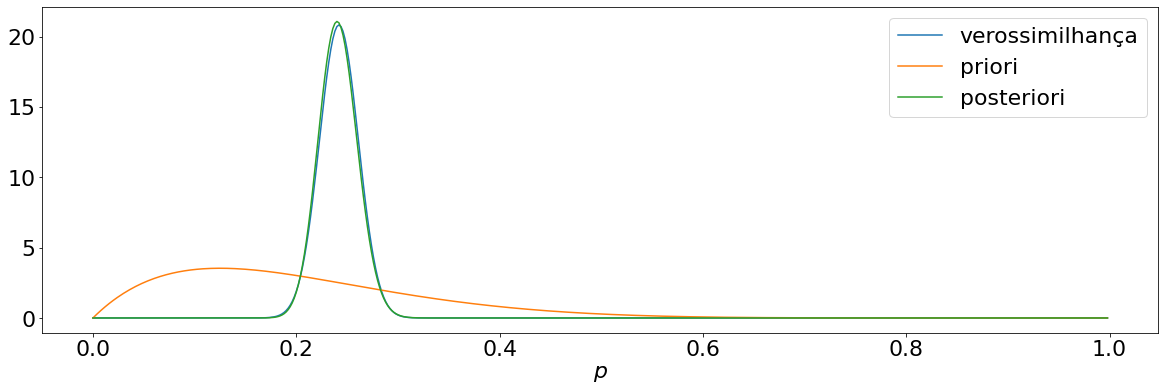

In [6]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Eixo x entre 0 e 1 de .002 em .002.
x_axis = np.arange(0, 1, 0.002)

# Plota as densidades da beta para cada conjunto de parâmetros
plt.figure(figsize=(20,6))
    
prior = beta(a, b)

p_chapeu = amostra['Inadimplente'].mean()
dp = np.sqrt(p_chapeu*(1-p_chapeu)/n)

media = p_chapeu
dp = np.sqrt(media*(1-media)/n)

plt.s = 0
plt.rcParams.update({'font.size': 22})

plt.plot(x_axis, norm.pdf(x_axis, media, dp), label='verossimilhança')
plt.plot(x_axis, prior.pdf(x_axis), label='priori')
plt.plot(x_axis, posteriori.pdf(x_axis), label='posteriori')    
plt.xlabel(r'$p$')
plt.legend()


In [7]:
# Estimador bayesiano EAP (Esperança a posteriori)
print('Média: %.2f' % posteriori.mean())


# E para calcular um intervalo de credibilidade, decidimos uma probabilidade 
# Por exemplo 95% para a credibilidade
# Uma maneira seria definir que 2,5% de cada cauda como os limites do intervalo (chamado intervalo simétrico)
# Este método é válido quando a posteriori se aproxima de uma distribuição simétrica, pois nesse caso tende a gerar o intervalo com menor amplitude
# A seguir, apresentamos outra solução com um intervalo de credibilidade de menor amplitude.

LI = posteriori.ppf(.025)
LS = posteriori.ppf(.975)
print("Intervalo com 95% de credibilidade: {:.3f}, {:.3f})".format(LI,LS))


Média: 0.24
Intervalo com 95% de credibilidade: 0.205, 0.279)


## Priori 2 - beta

- Priori: $p \sim beta(10, 5)$ => favorece p=1.0 => cauda à esquerda => nota-se pouco efeito na posteriori e no intervalo de credibilidade


- Posteriori: $p|k \sim beta(k+a, n-k+b)$

onde $k$ é o número de sucessos observados na amostra.


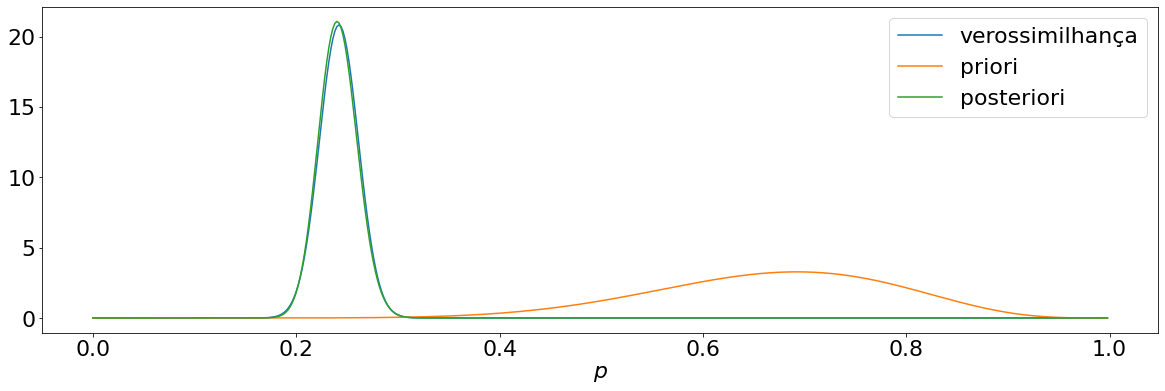

In [8]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Eixo x entre 0 e 1 de .002 em .002.
x_axis = np.arange(0, 1, 0.002)

# Plota as densidades da beta para cada conjunto de parâmetros
plt.figure(figsize=(20,6))

a = 10
b = 5
    
prior = beta(a, b)

p_chapeu = amostra['Inadimplente'].mean()
dp = np.sqrt(p_chapeu*(1-p_chapeu)/n)

media = p_chapeu
dp = np.sqrt(media*(1-media)/n)

plt.s = 0
plt.rcParams.update({'font.size': 22})

plt.plot(x_axis, norm.pdf(x_axis, media, dp), label='verossimilhança')
plt.plot(x_axis, prior.pdf(x_axis), label='priori')
plt.plot(x_axis, posteriori.pdf(x_axis), label='posteriori')    
plt.xlabel(r'$p$')
plt.legend()


In [9]:
# Estimador bayesiano EAP (Esperança a posteriori)
print('Média: %.2f' % posteriori.mean())


# E para calcular um intervalo de credibilidade, decidimos uma probabilidade 
# Por exemplo 95% para a credibilidade
# Uma maneira seria definir que 2,5% de cada cauda como os limites do intervalo (chamado intervalo simétrico)
# Este método é válido quando a posteriori se aproxima de uma distribuição simétrica, pois nesse caso tende a gerar o intervalo com menor amplitude
# A seguir, apresentamos outra solução com um intervalo de credibilidade de menor amplitude.

LI = posteriori.ppf(.025)
LS = posteriori.ppf(.975)
print("Intervalo com 95% de credibilidade: {:.3f}, {:.3f})".format(LI,LS))


Média: 0.24
Intervalo com 95% de credibilidade: 0.205, 0.279)


## Priori 3 - beta

- Priori: $p \sim beta(1, 1)$ => distribuição uniforme => nota-se pouco efeito na posteriori e no intervalo de credibilidade


- Posteriori: $p|k \sim beta(k+a, n-k+b)$

onde $k$ é o número de sucessos observados na amostra.


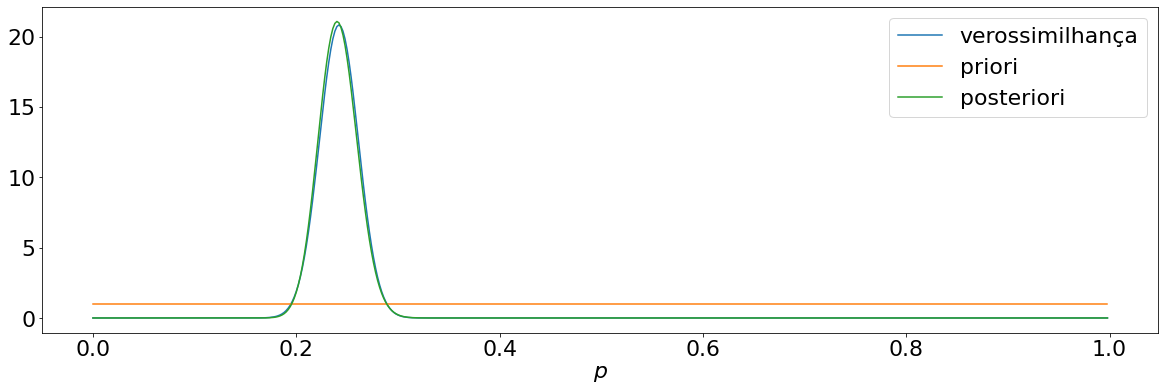

In [10]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Eixo x entre 0 e 1 de .002 em .002.
x_axis = np.arange(0, 1, 0.002)

# Plota as densidades da beta para cada conjunto de parâmetros
plt.figure(figsize=(20,6))

a = 1
b = 1

prior = beta(a, b)

p_chapeu = amostra['Inadimplente'].mean()
dp = np.sqrt(p_chapeu*(1-p_chapeu)/n)

media = p_chapeu
dp = np.sqrt(media*(1-media)/n)

plt.s = 0
plt.rcParams.update({'font.size': 22})

plt.plot(x_axis, norm.pdf(x_axis, media, dp), label='verossimilhança')
plt.plot(x_axis, prior.pdf(x_axis), label='priori')
plt.plot(x_axis, posteriori.pdf(x_axis), label='posteriori')    
plt.xlabel(r'$p$')
plt.legend()


In [11]:
# Estimador bayesiano EAP (Esperança a posteriori)
print('Média: %.2f' % posteriori.mean())


# E para calcular um intervalo de credibilidade, decidimos uma probabilidade 
# Por exemplo 95% para a credibilidade
# Uma maneira seria definir que 2,5% de cada cauda como os limites do intervalo (chamado intervalo simétrico)
# Este método é válido quando a posteriori se aproxima de uma distribuição simétrica, pois nesse caso tende a gerar o intervalo com menor amplitude
# A seguir, apresentamos outra solução com um intervalo de credibilidade de menor amplitude.

LI = posteriori.ppf(.025)
LS = posteriori.ppf(.975)
print("Intervalo com 95% de credibilidade: {:.3f}, {:.3f})".format(LI,LS))


Média: 0.24
Intervalo com 95% de credibilidade: 0.205, 0.279)


## Exemplos




In [6]:
#!pip install pymc3==3.11.1


In [7]:
#!pip install arviz==0.11.2

In [13]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import theano.tensor as tt


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [37]:
# !pip show pymc3

Name: pymc3
Version: 3.11.1
Summary: Probabilistic Programming in Python: Bayesian Modeling and Probabilistic Machine Learning with Theano
Home-page: http://github.com/pymc-devs/pymc3
Author: None
Author-email: None
License: Apache License, Version 2.0
Location: /home/cibele/anaconda3/lib/python3.7/site-packages
Requires: dill, patsy, fastprogress, scipy, theano-pymc, typing-extensions, numpy, arviz, pandas
Required-by: 


In [38]:
# !pip show arviz

Name: arviz
Version: 0.11.2
Summary: Exploratory analysis of Bayesian models
Home-page: http://github.com/arviz-devs/arviz
Author: ArviZ Developers
Author-email: None
License: Apache-2.0
Location: /home/cibele/anaconda3/lib/python3.7/site-packages
Requires: numpy, pandas, matplotlib, setuptools, netcdf4, scipy, xarray, packaging, typing-extensions
Required-by: pymc3


## Modelo beta-Bernoulli: clientes do banco 

Com amostra de 500 observações, considere, por exemplo, priori beta (10,5). Compare com os resultados obtidos em aula.

## Posteriori 1 - beta

- Priori: $p \sim beta(10, 5)$


- Posteriori: $p|k \sim beta(k+a, n-k+b)$ => amostra 2000 observações

onde $k$ é o número de sucessos observados na amostra.


In [14]:
with pm.Model() as model:
    p = pm.Beta("p", 10, 5)
    obs = pm.distributions.discrete.Bernoulli("obs", p, observed=amostra['Inadimplente'])

    idata = pm.sample(2000, tune=1500, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_500 tune and 2_000 draw iterations (6_000 + 8_000 draws total) took 62 seconds.


#### Análise de resultados

In [15]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.255,0.019,0.219,0.292,0.0,0.0,3357.0,5646.0,1.0


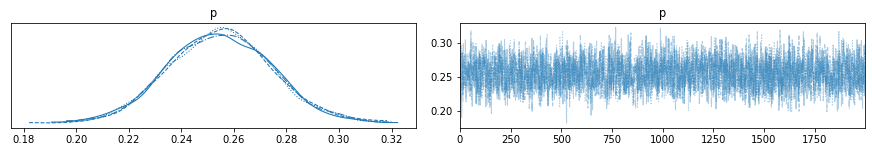

In [16]:
az.plot_trace(idata);


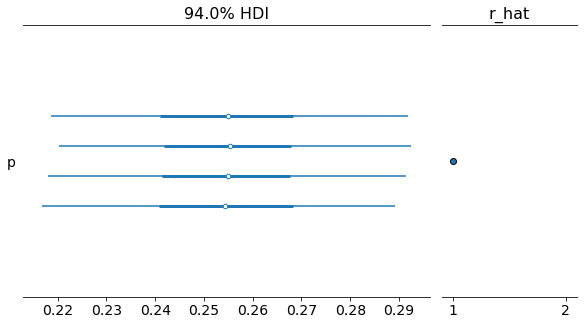

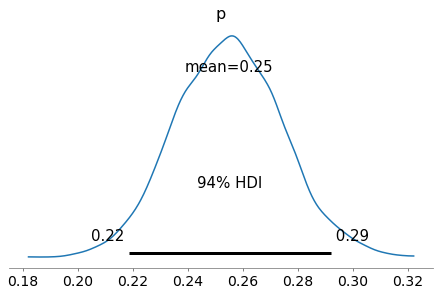

In [17]:
az.plot_forest(idata, r_hat=True);

az.plot_posterior(idata);


## Posteriori 2 - beta

- Priori: $p \sim beta(10, 5)$


- Posteriori: $p|k \sim beta(k+a, n-k+b)$ => amostra 500 observações => observamos pequena alteração no intervalo de credibilidade

onde $k$ é o número de sucessos observados na amostra.


In [19]:
with pm.Model() as model:
    p = pm.Beta("p", 10, 5)
    obs = pm.distributions.discrete.Bernoulli("obs", p, observed=amostra['Inadimplente'])

    idata = pm.sample(500, tune=1500, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_500 tune and 500 draw iterations (6_000 + 2_000 draws total) took 63 seconds.


#### Análise de resultados

In [20]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.254,0.019,0.219,0.291,0.001,0.0,912.0,1395.0,1.0


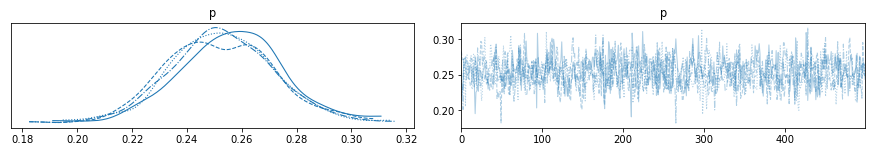

In [21]:
az.plot_trace(idata);


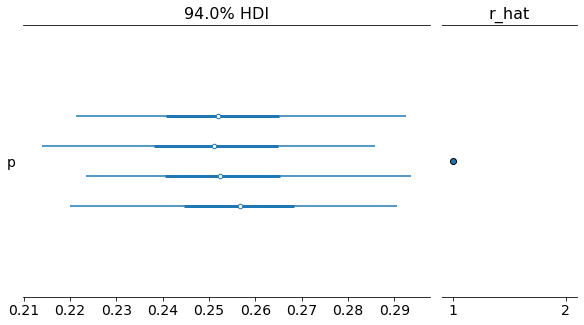

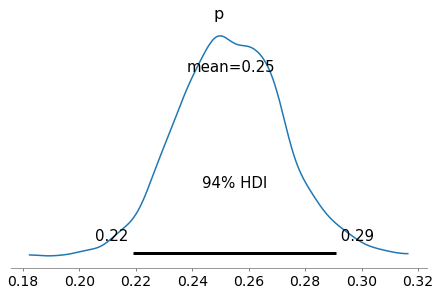

In [22]:
az.plot_forest(idata, r_hat=True);

az.plot_posterior(idata);


## Priori uniforme

Considere agora, por exemplo, priori uniforme para a proporção p. Como interfere na posteriori?

**Refaça as análises com diferentes tamanhos de amostra, por exemplo 100 ou 10000.**

## Priori 1 - uniforme

- Priori: $p \sim uniform$ => observa-se um deslocamento da média e intervalo de credibilidade em direção a p=0.0 comparado com a priori Beta


- Posteriori: $p|k \sim beta(k+a, n-k+b)$ => amostra 2000 observações

onde $k$ é o número de sucessos observados na amostra.


In [23]:
with pm.Model() as model:
    p = pm.Uniform("p")
    obs = pm.distributions.discrete.Bernoulli("obs", p, observed=amostra['Inadimplente'])

    idata = pm.sample(2000, tune=1500, return_inferencedata=True)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_500 tune and 2_000 draw iterations (6_000 + 8_000 draws total) took 61 seconds.
The acceptance probability does not match the target. It is 0.8802765491340847, but should be close to 0.8. Try to increase the number of tuning steps.


#### Análise de resultados

In [24]:
az.summary(idata)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.242,0.019,0.207,0.278,0.0,0.0,3129.0,5476.0,1.0


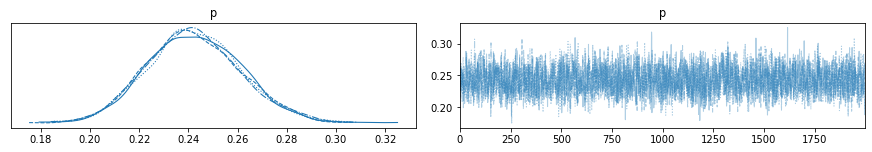

In [25]:

az.plot_trace(idata);



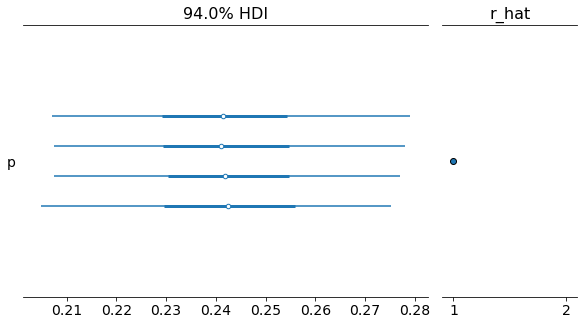

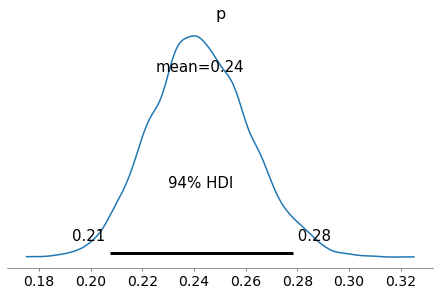

In [26]:
az.plot_forest(idata, r_hat=True);

az.plot_posterior(idata);


## Priori 2 - uniforme

- Priori: $p \sim uniform$ => observa-se pouca alteração em relação a Priori 1-uniforme, mas uma variação maior dos canais, intervalo de credibilidade e forma da curva posteriori

- Posteriori: $p|k \sim beta(k+a, n-k+b)$ => amostra 100 observações

onde $k$ é o número de sucessos observados na amostra.


In [27]:
with pm.Model() as model:
    p = pm.Uniform("p")
    obs = pm.distributions.discrete.Bernoulli("obs", p, observed=amostra['Inadimplente'])

    idata = pm.sample(100, tune=1500, return_inferencedata=True)



Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_500 tune and 100 draw iterations (6_000 + 400 draws total) took 63 seconds.


#### Análise de resultados

In [28]:
az.summary(idata)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.241,0.018,0.21,0.278,0.001,0.001,201.0,256.0,1.01


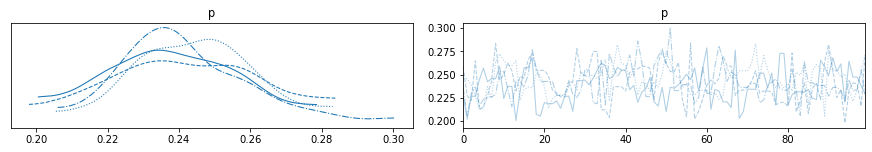

In [29]:

az.plot_trace(idata);



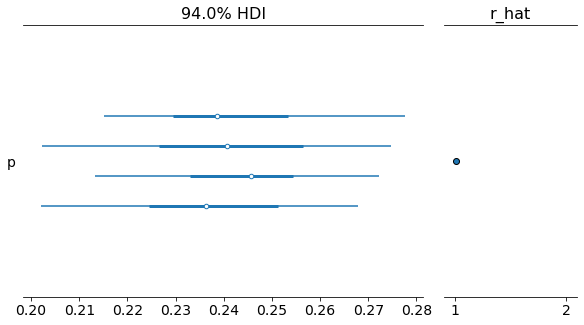

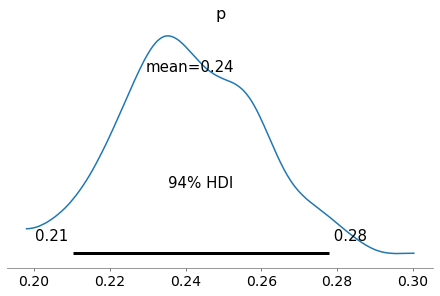

In [30]:
az.plot_forest(idata, r_hat=True);

az.plot_posterior(idata);


## Priori 3 - uniforme

- Priori: $p \sim uniform$ => observa-se um deslocamento da média e intervalo de credibilidade em direção a p=0.0


- Posteriori: $p|k \sim beta(k+a, n-k+b)$ => amostra 10000 observações

onde $k$ é o número de sucessos observados na amostra.


In [31]:
with pm.Model() as model:
    p = pm.Uniform("p")
    obs = pm.distributions.discrete.Bernoulli("obs", p, observed=amostra['Inadimplente'])

    idata = pm.sample(10000, tune=1500, return_inferencedata=True)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_500 tune and 10_000 draw iterations (6_000 + 40_000 draws total) took 79 seconds.
The acceptance probability does not match the target. It is 0.8813795065608537, but should be close to 0.8. Try to increase the number of tuning steps.


#### Análise de resultados

In [32]:
az.summary(idata)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.243,0.019,0.208,0.279,0.0,0.0,16783.0,27509.0,1.0


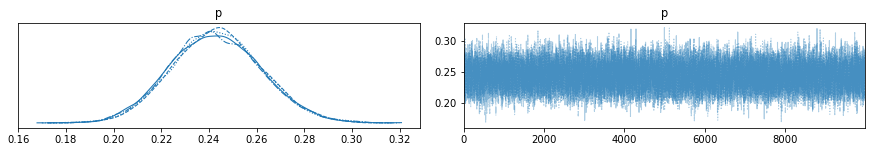

In [33]:

az.plot_trace(idata);



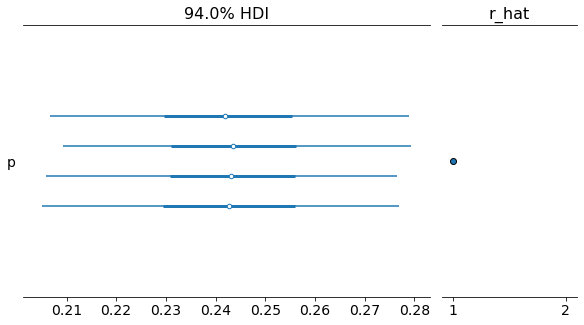

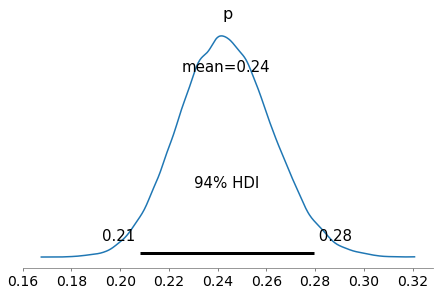

In [34]:
az.plot_forest(idata, r_hat=True);

az.plot_posterior(idata);
